### isin()

In [1]:
import pandas as pd

In [2]:
delivery = pd.read_csv('deliveries.csv')
delivery.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [7]:
death_over = delivery[delivery['over'] > 15]

In [19]:
all_batsman = death_over.groupby('batsman')['batsman_runs'].count()
batsman_list = all_batsman[all_batsman > 200].sort_values(ascending=False).index.tolist()

In [23]:
## runs scored by all these 43 batsman
# Balls played
final = delivery[delivery['batsman'].isin(batsman_list)]
final

match_id  inning                 batting_team  \
0              1       1          Sunrisers Hyderabad   
1              1       1          Sunrisers Hyderabad   
2              1       1          Sunrisers Hyderabad   
3              1       1          Sunrisers Hyderabad   
4              1       1          Sunrisers Hyderabad   
...          ...     ...                          ...   
150442       636       2  Royal Challengers Bangalore   
150443       636       2  Royal Challengers Bangalore   
150445       636       2  Royal Challengers Bangalore   
150446       636       2  Royal Challengers Bangalore   
150448       636       2  Royal Challengers Bangalore   

                       bowling_team  over  ball    batsman  non_striker  \
0       Royal Challengers Bangalore     1     1  DA Warner     S Dhawan   
1       Royal Challengers Bangalore     1     2  DA Warner     S Dhawan   
2       Royal Challengers Bangalore     1     3  DA Warner     S Dhawan   
3       Royal Challengers Bangalore     1     4  DA Warner     S Dhawan   
4       Royal Challengers Bangalore     1     5  DA Warner     S Dhawan   
...                             ...   ...   ...        ...          ...   
150442          Sunrisers Hyderabad    18     1  STR Binny  Sachin Baby   
150443          Sunrisers Hyderabad    18     2  STR Binny  Sachin Baby   
150445          Sunrisers Hyderabad    18     4  STR Binny  Sachin Baby   
150446          Sunrisers Hyderabad    18     5  STR Binny  Sachin Baby   
150448          Sunrisers Hyderabad    19     1  STR Binny  Sachin Baby   

                   bowler  is_super_over  ...  bye_runs  legbye_runs  \
0                TS Mills              0  ...         0            0   
1                TS Mills              0  ...         0            0   
2                TS Mills              0  ...         0            0   
3                TS Mills              0  ...         0            0   
4                TS Mills              0  ...         0            0   
...                   ...            ...  ...       ...          ...   
150442            B Kumar              0  ...         0            0   
150443            B Kumar              0  ...         0            0   
150445            B Kumar              0  ...         0            0   
150446            B Kumar              0  ...         0            1   
150448  Mustafizur Rahman              0  ...         0            0   

        noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
0                 0             0             0           0           0   
1                 0             0             0           0           0   
2                 0             0             4           0           4   
3                 0             0             0           0           0   
4                 0             0             0           2           2   
...             ...           ...           ...         ...         ...   
150442            0             0             0           0           0   
150443            0             0             1           0           1   
150445            0             0             0           0           0   
150446            0             0             0           1           1   
150448            0             0             1           0           1   

        player_dismissed dismissal_kind   fielder  
0                    NaN            NaN       NaN  
1                    NaN            NaN       NaN  
2                    NaN            NaN       NaN  
3                    NaN            NaN       NaN  
4                    NaN            NaN       NaN  
...                  ...            ...       ...  
150442               NaN            NaN       NaN  
150443               NaN            NaN       NaN  
150445               NaN            NaN       NaN  
150446               NaN            NaN       NaN  
150448         STR Binny        run out  DJ Hooda  

[66006 rows x 21 columns]

In [28]:
runs = final.groupby('batsman')['batsman_runs'].sum()

In [29]:
balls = final.groupby('batsman')['batsman_runs'].count()

In [30]:
sr = (runs/balls) * 100
sr

batsman
A Mishra             89.005236
AB de Villiers      145.129059
AD Mathews          120.868114
AM Rahane           117.486549
AR Patel            122.672065
AT Rayudu           123.014257
BJ Hodge            121.422376
DA Miller           137.709251
DA Warner           138.318401
DJ Bravo            122.286822
DJ Hussey           120.072661
DPMD Jayawardene    118.791064
Harbhajan Singh     135.194585
IK Pathan           116.751269
JA Morkel           136.938202
JH Kallis           105.936272
JP Duminy           121.970624
JP Faulkner         129.802956
KA Pollard          140.621266
KD Karthik          123.008475
KM Jadhav           130.555556
LRPL Taylor         120.070838
MK Pandey           116.938453
MK Tiwary           114.127424
MS Dhoni            132.835821
NV Ojha             114.528024
P Kumar             105.263158
PP Chawla           110.278373
R Vinay Kumar       106.666667
RA Jadeja           118.792867
RG Sharma           128.497251
RV Uthappa          127.635135


In [33]:
delivery.head(2)

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  

[2 rows x 21 columns]

In [32]:
match = pd.read_csv('matches - matches.csv')
match.head(2)

id  season       city        date                team1  \
0   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06       Mumbai Indians   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   

   result  dl_applied                  winner  win_by_runs  win_by_wickets  \
0  normal           0     Sunrisers Hyderabad           35               0   
1  normal           0  Rising Pune Supergiant            0               7   

  player_of_match                                      venue         umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   

    umpire2  umpire3  
0  NJ Llong      NaN  
1    S Ravi      NaN

In [36]:
delivery.merge(match,left_on='match_id',  right_on='id').head(2)

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  result  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...  normal   
1     2  DA Warner    S Dhawan  TS Mills              0  ...  normal   

   dl_applied               winner  win_by_runs  win_by_wickets  \
0           0  Sunrisers Hyderabad           35               0   
1           0  Sunrisers Hyderabad           35               0   

   player_of_match                                      venue      umpire1  \
0     Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
1     Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   

    umpire2 umpire3  
0  NJ Llong     NaN  
1  NJ Llong     NaN  

[2 rows x 39 columns]

In [37]:
delivery.merge(match,left_on='match_id',  right_on='id').shape

(150460, 39)

In [39]:
new = delivery.merge(match,left_on='match_id',  right_on='id')
new.head(2)

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  result  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...  normal   
1     2  DA Warner    S Dhawan  TS Mills              0  ...  normal   

   dl_applied               winner  win_by_runs  win_by_wickets  \
0           0  Sunrisers Hyderabad           35               0   
1           0  Sunrisers Hyderabad           35               0   

   player_of_match                                      venue      umpire1  \
0     Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
1     Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   

    umpire2 umpire3  
0  NJ Llong     NaN  
1  NJ Llong     NaN  

[2 rows x 39 columns]

In [42]:
type(new.groupby(['season', 'batsman'])['batsman_runs'].sum())

pandas.core.series.Series

In [48]:
# Multi index series
new.groupby(['season', 'batsman'])['batsman_runs'].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset='season',keep='first').sort_values('season')

season       batsman  batsman_runs
10    2008      SE Marsh           616
14    2009     ML Hayden           572
9     2010  SR Tendulkar           618
11    2011      CH Gayle           608
3     2012      CH Gayle           733
2     2013    MEK Hussey           733
6     2014    RV Uthappa           660
17    2015     DA Warner           562
0     2016       V Kohli           973
7     2017     DA Warner           641

## Pivot Table

In [50]:
six = delivery[delivery['batsman_runs'] == 6]
six.head(2)

match_id  inning         batting_team                 bowling_team  over  \
10         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     2   
47         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     8   

    ball       batsman non_striker       bowler  is_super_over  ...  bye_runs  \
10     4     DA Warner    S Dhawan  A Choudhary              0  ...         0   
47     4  MC Henriques    S Dhawan      TM Head              0  ...         0   

    legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
10            0            0             0             6           0   
47            0            0             0             6           0   

    total_runs  player_dismissed dismissal_kind fielder  
10           6               NaN            NaN     NaN  
47           6               NaN            NaN     NaN  

[2 rows x 21 columns]

In [51]:
six.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [57]:
pt = six.pivot_table(index='over', columns='batting_team', values='batsman_runs' ,aggfunc='count')
pt

batting_team  Chennai Super Kings  Deccan Chargers  Delhi Daredevils  \
over                                                                   
1                             5.0              3.0              14.0   
2                            17.0             21.0              19.0   
3                            37.0             11.0              30.0   
4                            34.0             17.0              41.0   
5                            41.0             27.0              29.0   
6                            43.0             22.0              27.0   
7                            22.0             11.0              20.0   
8                            25.0             13.0              26.0   
9                            23.0             17.0              32.0   
10                           23.0             14.0              24.0   
11                           36.0             15.0              34.0   
12                           36.0             26.0              38.0   
13                           35.0             23.0              37.0   
14                           45.0             22.0              35.0   
15                           43.0             20.0              28.0   
16                           46.0             21.0              43.0   
17                           51.0             38.0              56.0   
18                           58.0             37.0              44.0   
19                           54.0             23.0              59.0   
20                           68.0             19.0              50.0   

batting_team  Gujarat Lions  Kings XI Punjab  Kochi Tuskers Kerala  \
over                                                                 
1                       4.0             10.0                   2.0   
2                       6.0             19.0                   4.0   
3                      14.0             27.0                   3.0   
4                       9.0             36.0                   3.0   
5                      11.0             30.0                   3.0   
6                      12.0             39.0                   3.0   
7                      10.0             19.0                   2.0   
8                       6.0             35.0                   2.0   
9                      11.0             36.0                   1.0   
10                      8.0             29.0                   3.0   
11                      5.0             37.0                   1.0   
12                      7.0             38.0                   3.0   
13                      5.0             47.0                   2.0   
14                      8.0             41.0                   3.0   
15                      5.0             51.0                   4.0   
16                      5.0             59.0                   NaN   
17                      7.0             39.0                   3.0   
18                      9.0             57.0                   4.0   
19                      9.0             53.0                   5.0   
20                      4.0             60.0                   2.0   

batting_team  Kolkata Knight Riders  Mumbai Indians  Pune Warriors  \
over                                                                 
1                              10.0             9.0            5.0   
2                              13.0            17.0            6.0   
3                              28.0            22.0            6.0   
4                              35.0            28.0            7.0   
5                              25.0            43.0            7.0   
6                              34.0            50.0            3.0   
7                              26.0            18.0            5.0   
8                              25.0            23.0           10.0   
9                              27.0            35.0            9.0   
10                             21.0            22.0            6.0   
11                             34.

In [56]:
import seaborn as sns

<AxesSubplot:xlabel='batting_team', ylabel='over'>

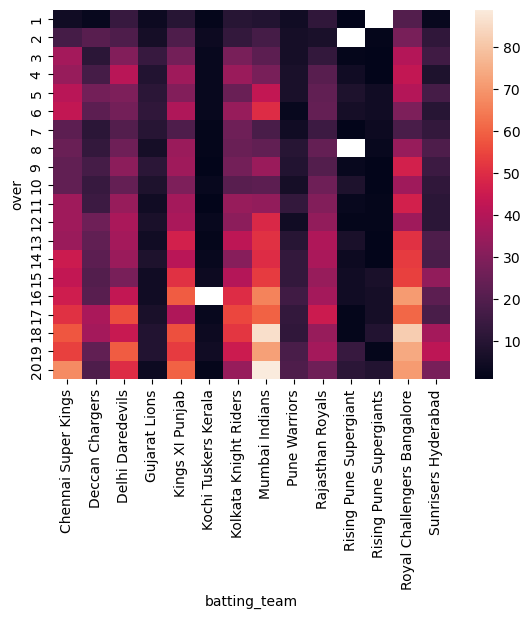

In [58]:
sns.heatmap(pt)

### Correlation

In [60]:
match.corr()

id    season  dl_applied  win_by_runs  win_by_wickets  \
id              1.000000  0.471087    0.024281    -0.010263       -0.015510   
season          0.471087  1.000000    0.004170    -0.016815       -0.000708   
dl_applied      0.024281  0.004170    1.000000    -0.010893       -0.011640   
win_by_runs    -0.010263 -0.016815   -0.010893     1.000000       -0.565181   
win_by_wickets -0.015510 -0.000708   -0.011640    -0.565181        1.000000   
umpire3              NaN       NaN         NaN          NaN             NaN   

                umpire3  
id                  NaN  
season              NaN  
dl_applied          NaN  
win_by_runs         NaN  
win_by_wickets      NaN  
umpire3             NaN

<AxesSubplot:>

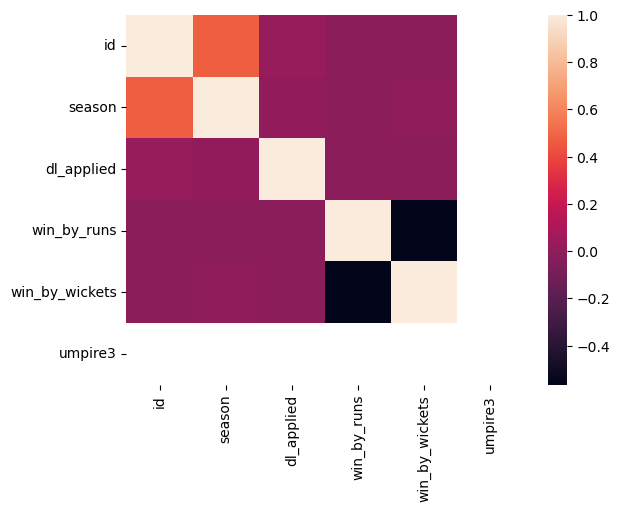

In [61]:
sns.heatmap(match.corr())

### Rename Columns

In [62]:
match.head(2)

id  season       city        date                team1  \
0   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06       Mumbai Indians   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   

   result  dl_applied                  winner  win_by_runs  win_by_wickets  \
0  normal           0     Sunrisers Hyderabad           35               0   
1  normal           0  Rising Pune Supergiant            0               7   

  player_of_match                                      venue         umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   

    umpire2  umpire3  
0  NJ Llong      NaN  
1    S Ravi      NaN

In [67]:
match.rename(columns={'city' :'place', 'date' : 'dom'}).head(2)

id  season      place         dom                team1  \
0   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06       Mumbai Indians   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   

   result  dl_applied                  winner  win_by_runs  win_by_wickets  \
0  normal           0     Sunrisers Hyderabad           35               0   
1  normal           0  Rising Pune Supergiant            0               7   

  player_of_match                                      venue         umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   

    umpire2  umpire3  
0  NJ Llong      NaN  
1    S Ravi      NaN

# set_index() , reset_index()

In [72]:
match.set_index('id')

season       city        date                        team1  \
id                                                                
1      2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
2      2017       Pune  2017-04-06               Mumbai Indians   
3      2017     Rajkot  2017-04-07                Gujarat Lions   
4      2017     Indore  2017-04-08       Rising Pune Supergiant   
5      2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
..      ...        ...         ...                          ...   
632    2016     Raipur  2016-05-22             Delhi Daredevils   
633    2016  Bangalore  2016-05-24                Gujarat Lions   
634    2016      Delhi  2016-05-25          Sunrisers Hyderabad   
635    2016      Delhi  2016-05-27                Gujarat Lions   
636    2016  Bangalore  2016-05-29          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
id                                                                            
1    Royal Challengers Bangalore  Royal Challengers Bangalore         field   
2         Rising Pune Supergiant       Rising Pune Supergiant         field   
3          Kolkata Knight Riders        Kolkata Knight Riders         field   
4                Kings XI Punjab              Kings XI Punjab         field   
5               Delhi Daredevils  Royal Challengers Bangalore           bat   
..                           ...                          ...           ...   
632  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
633  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
634        Kolkata Knight Riders        Kolkata Knight Riders         field   
635          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
636  Royal Challengers Bangalore          Sunrisers Hyderabad           bat   

     result  dl_applied                       winner  win_by_runs  \
id                                                                  
1    normal           0          Sunrisers Hyderabad           35   
2    normal           0       Rising Pune Supergiant            0   
3    normal           0        Kolkata Knight Riders            0   
4    normal           0              Kings XI Punjab            0   
5    normal           0  Royal Challengers Bangalore           15   
..      ...         ...                          ...          ...   
632  normal           0  Royal Challengers Bangalore            0   
633  normal           0  Royal Challengers Bangalore            0   
634  normal           0          Sunrisers Hyderabad           22   
635  normal           0          Sunrisers Hyderabad            0   
636  normal           0          Sunrisers Hyderabad            8   

     win_by_wickets player_of_match  \
id                                    
1                 0    Yuvraj Singh   
2                 7       SPD Smith   
3                10         CA Lynn   
4                 6      GJ Maxwell   
5                 0       KM Jadhav   
..              ...             ...   
632               6         V Kohli   
633               4  AB de Villiers   
634               0    MC Henriques   
635               4       DA Warner   
636               0     BCJ Cutting   

                                                venue          umpire1  \
id                                                                       
1           Rajiv Gandhi International Stadium, Uppal      AY Dandekar   
2             Maharashtra Cricket Association Stadium   A Nand Kishore   
3              Saurashtra Cricket Association Stadium      Nitin Menon   
4                              Holkar Cricket Stadium     AK Chaudhary   
5                               M Chinnaswamy Stadium              NaN   
..                                                ...              ...   
632  Shaheed Veer Narayan Singh International Stadium   A Nand Kishore   
633                             M

In [71]:
match.set_index('id').reset_index()

id  season       city        date                        team1  \
0      1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1      2    2017       Pune  2017-04-06               Mumbai Indians   
2      3    2017     Rajkot  2017-04-07                Gujarat Lions   
3      4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4      5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
..   ...     ...        ...         ...                          ...   
631  632    2016     Raipur  2016-05-22             Delhi Daredevils   
632  633    2016  Bangalore  2016-05-24                Gujarat Lions   
633  634    2016      Delhi  2016-05-25          Sunrisers Hyderabad   
634  635    2016      Delhi  2016-05-27                Gujarat Lions   
635  636    2016  Bangalore  2016-05-29          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1         Rising Pune Supergiant       Rising Pune Supergiant         field   
2          Kolkata Knight Riders        Kolkata Knight Riders         field   
3                Kings XI Punjab              Kings XI Punjab         field   
4               Delhi Daredevils  Royal Challengers Bangalore           bat   
..                           ...                          ...           ...   
631  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
632  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
633        Kolkata Knight Riders        Kolkata Knight Riders         field   
634          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
635  Royal Challengers Bangalore          Sunrisers Hyderabad           bat   

     result  dl_applied                       winner  win_by_runs  \
0    normal           0          Sunrisers Hyderabad           35   
1    normal           0       Rising Pune Supergiant            0   
2    normal           0        Kolkata Knight Riders            0   
3    normal           0              Kings XI Punjab            0   
4    normal           0  Royal Challengers Bangalore           15   
..      ...         ...                          ...          ...   
631  normal           0  Royal Challengers Bangalore            0   
632  normal           0  Royal Challengers Bangalore            0   
633  normal           0          Sunrisers Hyderabad           22   
634  normal           0          Sunrisers Hyderabad            0   
635  normal           0          Sunrisers Hyderabad            8   

     win_by_wickets player_of_match  \
0                 0    Yuvraj Singh   
1                 7       SPD Smith   
2                10         CA Lynn   
3                 6      GJ Maxwell   
4                 0       KM Jadhav   
..              ...             ...   
631               6         V Kohli   
632               4  AB de Villiers   
633               0    MC Henriques   
634               4       DA Warner   
635               0     BCJ Cutting   

                                                venue          umpire1  \
0           Rajiv Gandhi International Stadium, Uppal      AY Dandekar   
1             Maharashtra Cricket Association Stadium   A Nand Kishore   
2              Saurashtra Cricket Association Stadium      Nitin Menon   
3                              Holkar Cricket Stadium     AK Chaudhary   
4                               M Chinnaswamy Stadium              NaN   
..                                                ...              ...   
631  Shaheed Veer Narayan Singh International Stadium   A Nand Kishore   
632                             M Chinnaswamy Stadium     AK Chaudhary   
633                                  Feroz Shah Kotla        M Erasmus   
634                                  Feroz Shah Kotla        M Erasmus   
635                             M Chinnaswamy Stadium  HDPK Dharmasena   

     

In [74]:
match['winner'].value_counts().reset_index()

index  winner
0                Mumbai Indians      92
1           Chennai Super Kings      79
2         Kolkata Knight Riders      77
3   Royal Challengers Bangalore      73
4               Kings XI Punjab      70
5              Rajasthan Royals      63
6              Delhi Daredevils      62
7           Sunrisers Hyderabad      42
8               Deccan Chargers      29
9                 Gujarat Lions      13
10                Pune Warriors      12
11       Rising Pune Supergiant      10
12         Kochi Tuskers Kerala       6
13      Rising Pune Supergiants       5

### Dropna

In [75]:
match.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [80]:
match.drop('umpire3', axis=1, inplace=True)

In [81]:
match.shape

(636, 17)

In [82]:
match.dropna().shape # because all 

(625, 17)

In [83]:
match.shape

(636, 17)

In [85]:
match.dropna(how='all').shape # only if all the rows are empty

(636, 17)

In [86]:
match.dropna(how='any').shape

(625, 17)

In [87]:
match.dropna(subset='city').shape

(629, 17)

### Fillna

In [88]:
match.fillna(0)

id  season       city        date                        team1  \
0      1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1      2    2017       Pune  2017-04-06               Mumbai Indians   
2      3    2017     Rajkot  2017-04-07                Gujarat Lions   
3      4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4      5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
..   ...     ...        ...         ...                          ...   
631  632    2016     Raipur  2016-05-22             Delhi Daredevils   
632  633    2016  Bangalore  2016-05-24                Gujarat Lions   
633  634    2016      Delhi  2016-05-25          Sunrisers Hyderabad   
634  635    2016      Delhi  2016-05-27                Gujarat Lions   
635  636    2016  Bangalore  2016-05-29          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1         Rising Pune Supergiant       Rising Pune Supergiant         field   
2          Kolkata Knight Riders        Kolkata Knight Riders         field   
3                Kings XI Punjab              Kings XI Punjab         field   
4               Delhi Daredevils  Royal Challengers Bangalore           bat   
..                           ...                          ...           ...   
631  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
632  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
633        Kolkata Knight Riders        Kolkata Knight Riders         field   
634          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
635  Royal Challengers Bangalore          Sunrisers Hyderabad           bat   

     result  dl_applied                       winner  win_by_runs  \
0    normal           0          Sunrisers Hyderabad           35   
1    normal           0       Rising Pune Supergiant            0   
2    normal           0        Kolkata Knight Riders            0   
3    normal           0              Kings XI Punjab            0   
4    normal           0  Royal Challengers Bangalore           15   
..      ...         ...                          ...          ...   
631  normal           0  Royal Challengers Bangalore            0   
632  normal           0  Royal Challengers Bangalore            0   
633  normal           0          Sunrisers Hyderabad           22   
634  normal           0          Sunrisers Hyderabad            0   
635  normal           0          Sunrisers Hyderabad            8   

     win_by_wickets player_of_match  \
0                 0    Yuvraj Singh   
1                 7       SPD Smith   
2                10         CA Lynn   
3                 6      GJ Maxwell   
4                 0       KM Jadhav   
..              ...             ...   
631               6         V Kohli   
632               4  AB de Villiers   
633               0    MC Henriques   
634               4       DA Warner   
635               0     BCJ Cutting   

                                                venue          umpire1  \
0           Rajiv Gandhi International Stadium, Uppal      AY Dandekar   
1             Maharashtra Cricket Association Stadium   A Nand Kishore   
2              Saurashtra Cricket Association Stadium      Nitin Menon   
3                              Holkar Cricket Stadium     AK Chaudhary   
4                               M Chinnaswamy Stadium                0   
..                                                ...              ...   
631  Shaheed Veer Narayan Singh International Stadium   A Nand Kishore   
632                             M Chinnaswamy Stadium     AK Chaudhary   
633                                  Feroz Shah Kotla        M Erasmus   
634                                  Feroz Shah Kotla        M Erasmus   
635                             M Chinnaswamy Stadium  HDPK Dharmasena   

     

In [89]:
match.isna().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [90]:
match['city'].fillna("Not Specified")

0      Hyderabad
1           Pune
2         Rajkot
3         Indore
4      Bangalore
         ...    
631       Raipur
632    Bangalore
633        Delhi
634        Delhi
635    Bangalore
Name: city, Length: 636, dtype: object

In [91]:
match['city'].fillna(method='bfill')

0      Hyderabad
1           Pune
2         Rajkot
3         Indore
4      Bangalore
         ...    
631       Raipur
632    Bangalore
633        Delhi
634        Delhi
635    Bangalore
Name: city, Length: 636, dtype: object

In [92]:
match['city'].fillna(method='ffill')

0      Hyderabad
1           Pune
2         Rajkot
3         Indore
4      Bangalore
         ...    
631       Raipur
632    Bangalore
633        Delhi
634        Delhi
635    Bangalore
Name: city, Length: 636, dtype: object